In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
dati = pd.read_csv('database_ripulito.csv')
del(dati['Unnamed: 0'])
dati.head()

,NCOMP,ETAMi,SESSO,LEZPR,INFOR,LING,MMSCLA,SPOCON,SPOSAL,BIRRA,...,FUMO,FRFUMO,TFUMO,NSIGARM,SALUTE,CRONI,DIAB,FEGATO,CIRRO,NEURO
0,4,9,2,1.0,1.0,1.0,15.0,1.0,1.0,6.0,...,3.0,NaN,NaN,NaN,2,1.0,1.0,3.0,5.0,5.0
1,4,9,1,1.0,1.0,1.0,99.0,1.0,2.0,1.0,...,1.0,1.0,3.0,17.0,2,1.0,1.0,3.0,5.0,5.0
2,3,9,2,1.0,1.0,4.0,50.0,2.0,NaN,6.0,...,3.0,NaN,NaN,NaN,2,1.0,1.0,3.0,5.0,5.0
3,3,8,2,1.0,1.0,1.0,NaN,1.0,1.0,6.0,...,3.0,NaN,NaN,NaN,2,1.0,1.0,3.0,5.0,5.0
4,3,7,2,1.0,1.0,1.0,23.0,1.0,1.0,6.0,...,3.0,NaN,NaN,NaN,2,1.0,1.0,3.0,5.0,5.0


In [4]:
palette=["#0072c6","#00a2e8","#66b2ff","#99cfff","#cce6ff"]

In [32]:
labels_eta = ['11-13 anni', '14-15 anni', '16-17 anni', '18-19 anni', '20-24 anni', '25-29 anni']

Birra            1.482759
Vino             2.405405
Superalcolici    3.571429
Name: 0, dtype: float64

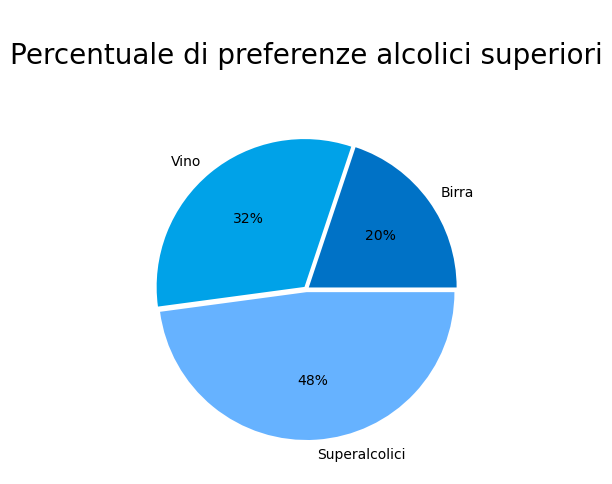

In [6]:
dati_superiori= dati[dati['ETAMi'].between(4,7)]
dati_uni = dati[dati['ETAMi'].between(8,9)]

boh= [dati_superiori[dati_superiori['BIRRA']<4]['BICBIRRAM'].mean(), dati_superiori[dati_superiori['VINO']<4]['BICVINOM'].mean(),dati_superiori[dati_superiori['LIQUOR']<4]['BICALTROM'].mean()]
boh
labels =['Birra', 'Vino', 'Superalcolici']
data = pd.DataFrame(index=labels, data=boh)
display(data[0])

explode=(0.02,0.02, 0.02)
plt.title("\nPercentuale di preferenze alcolici superiori\n",fontsize=20)
plt.pie(data[0], labels = data.index,colors=palette, autopct='%.0f%%', explode=explode)
plt.show()


Birra            1.531049
Vino             1.760563
Superalcolici    2.909091
Name: 0, dtype: float64

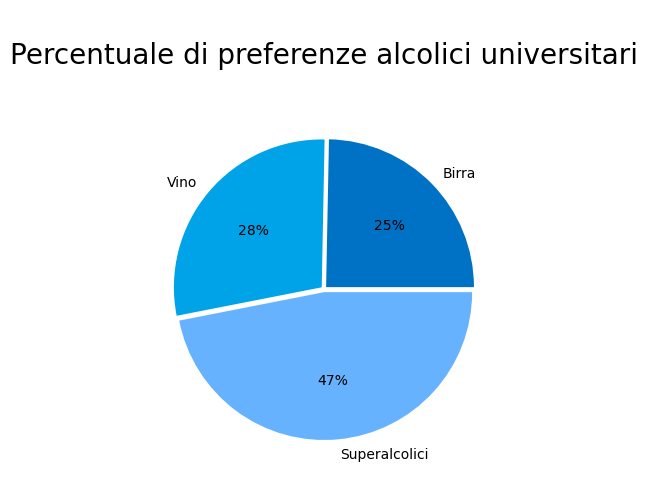

In [7]:
boh= [dati_uni[dati_uni['BIRRA']<4]['BICBIRRAM'].mean(), dati_uni[dati_uni['VINO']<4]['BICVINOM'].mean(),dati_uni[dati_uni['LIQUOR']<4]['BICALTROM'].mean()]
boh
labels =['Birra', 'Vino', 'Superalcolici']
data = pd.DataFrame(index=labels, data=boh)
display(data[0])

explode=(0.02,0.02, 0.02)
plt.title("\nPercentuale di preferenze alcolici universitari\n",fontsize=20)
plt.pie(data[0], labels = data.index,colors=palette, autopct='%.0f%%', explode=explode)
plt.show()


In [8]:
dati[dati['BIRRA']<4]['BICBIRRAM'].value_counts(normalize=True)
pd.crosstab(dati[dati['BIRRA']<4]['BICBIRRAM'], dati[dati['BIRRA']<4]['ETAMi'], normalize=True)

ETAMi,4,5,6,7,8,9
BICBIRRAM,,,,,,
1.0,0.000000,0.009524,0.011429,0.055238,0.180952,0.420952
2.0,0.001905,0.000000,0.005714,0.017143,0.045714,0.131429
3.0,0.000000,0.000000,0.003810,0.001905,0.013333,0.059048
4.0,0.000000,0.000000,0.000000,0.000000,0.007619,0.009524
5.0,0.000000,0.000000,0.000000,0.001905,0.003810,0.001905
6.0,0.000000,0.000000,0.000000,0.001905,0.001905,0.013333


In [9]:
totale_alcol = pd.crosstab(dati[dati['BIRRA']<4]['ETAMi'],dati[dati['BIRRA']<4]['BICBIRRAM'],  normalize=True)+ pd.crosstab( dati[dati['VINO']<4]['ETAMi'], dati[dati['VINO']<4]['BICVINOM'], normalize=True) + pd.crosstab( dati[dati['LIQUOR']<4]['ETAMi'], dati[dati['LIQUOR']<4]['BICALTROM'], normalize=True)

In [21]:
totale_alcol =(dati[dati['LIQUOR']<4].groupby(["ETAMi"],as_index=False)["BICALTROM"].mean()['BICALTROM'] + dati[dati['VINO']<4].groupby(["ETAMi"],as_index=False)["BICVINOM"].mean()['BICVINOM']+ dati[dati['BIRRA']<4].groupby(["ETAMi"],as_index=False)["BICBIRRAM"].mean()['BICBIRRAM'])

In [20]:
dati[dati['LIQUOR']<4].groupby(["ETAMi"],as_index=False)["BICALTROM"].sum()

,ETAMi,BICALTROM
0,4,0.0
1,5,5.0
2,6,3.0
3,7,17.0
4,8,33.0
5,9,63.0


In [22]:
totale_alcol

0         NaN
1    9.600000
2    5.303030
3    7.904472
4    7.483742
5    5.802506
dtype: float64

In [23]:
totale_alcol[1:3], totale_alcol[4:]

(1    9.60000
 2    5.30303
 dtype: float64,
 4    7.483742
 5    5.802506
 dtype: float64)

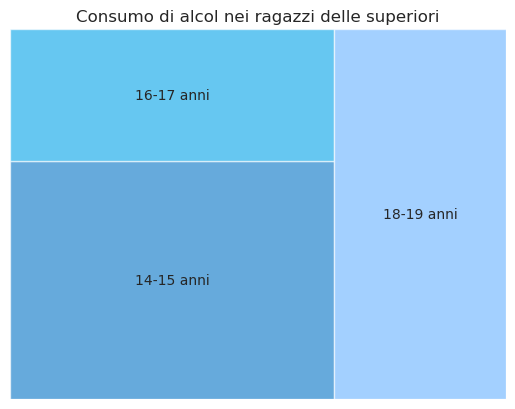

In [33]:
import squarify

sns.set_style(style="whitegrid") 
l = ['11-13','14-15','16-17','18-19','20-24','25-29']
squarify.plot(sizes=totale_alcol[1:4], label=labels_eta[1:4], alpha=0.6, color=palette).set(
    title='Consumo di alcol nei ragazzi delle superiori')
plt.axis('off')
plt.show()

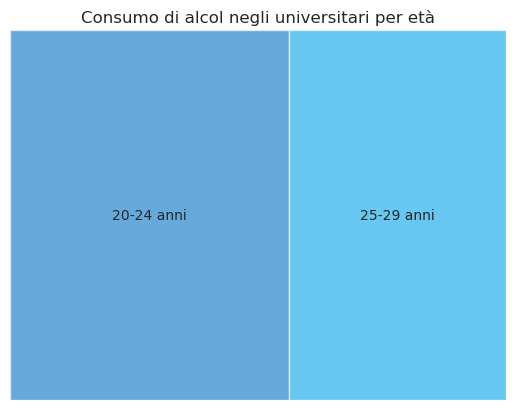

In [34]:
sns.set_style(style="whitegrid") 
l = ['11-13','14-15','16-17','18-19','20-24','25-34']
squarify.plot(sizes=totale_alcol[4:], label=labels_eta[4:], alpha=0.6, color=palette).set(
    title='Consumo di alcol negli universitari per età')
plt.axis('off')
plt.show()